![Tech Salary Trends Background](image.png)

 # How Are Tech Salaries Shaping Up in 2020-2024? Part 3
 by John Mike Asuncion

## Executive Summary
This Level 3 analysis examines tech salary trends from 2020 to 2024 using a dataset of 57,194 salary records. The report addresses three key objectives to provide actionable insights for an international HR consultancy:
- **Impact of Country, Experience Level, and Remote Ratio on Salaries**: The US offers the highest average salaries, with Machine Learning Engineers at \$201,774, followed by Data Scientists at \$165,127. Senior and Executive-level professionals earn the most, with Executive Machine Learning Engineers averaging around \$210,000. On-site roles generally pay more, with Data Scientists earning \$160,000 on-site compared to \$80,000 in hybrid setups. The highest salaries occur in Mexico (mx), with Data Analysts earning \$429,950 and Data Scientists \$352,500, both on-site.
- **Predictive Model for Salary Estimation**: A Linear Regression model using experience level, company location, and remote ratio achieves an R-squared of 0.1932 and an RMSE of \$62,095. The strongest predictors are company_location_pr (Puerto Rico, coefficient: \$101,803.64), experience_level_ex (Executive, \$96,428.34), and company_location_mx (Mexico, \$81,031.21), highlighting the significant influence of specific locations and executive roles on salaries.
- **Expanded Model with Additional Features**: Adding company size and employment type slightly improves the model, increasing the R-squared to 0.1942 and reducing the RMSE to \$62,055. Top predictors remain company_location_ir (Iran, \$100,359.60), company_location_pr (\$98,330.67), and experience_level_ex (\$96,058.18). The marginal improvement suggests that outliers, such as high salaries in Mexico, continue to challenge accuracy. New features like industry sector and cost of living index are proposed to enhance future predictions.

**Brief Recommendations**: Offer competitive salaries above \$350,000 for top roles in high-paying regions like Mexico, especially for on-site positions, to attract talent. Focus on Senior and Executive-level professionals in the US, where average salaries are highest. Enhance data collection with variables like industry sector and cost of living index to improve model accuracy. Explore advanced models like Random Forest to better handle outliers and non-linear relationships.

## I. Background
Tech companies face fierce competition for talent, making salary insights critical for attracting and retaining skilled professionals. This analysis leverages a global salary dataset to uncover trends in job roles, experience levels, and remote work, helping an international HR consultancy stay competitive. With remote work surging and tech roles diversifying, understanding these drivers is more vital than ever.

## II. Objectives
This report aims to provide actionable insights into tech salary trends by addressing the following goals:

- Examining the impact of country, experience level, and remote ratio on salaries for Data Analysts, Data Scientists, and Machine Learning Engineers. Identifying conditions for the highest compensation.
- Constructing a predictive model for salary estimation using experience level, company location, and remote ratio, determining the strongest predictors.
- Improving the salary prediction model with company size and employment type. Performance evaluation and proposals for future enhancements.

## III. Data Description
The dataset, sourced from a survey hosted by an HR consultancy, is stored in `salaries.csv`. Each row represents an employee’s salary record for a given year. The columns are as follows:

| Column Name         | Description                                      | Expected Data Type |  
|---------------------|--------------------------------------------------|-------------------|  
| `work_year`         | Year of work                                     | int              |  
| `experience_level`  | Level of experience (e.g., EN, MI, SE, EX)       | str              |  
| `employment_type`   | Type of employment (e.g., FT, PT, CT, FL)        | str              |  
| `job_title`         | Job title of the employee                        | str              |  
| `salary`            | Salary amount in original currency               | int              |  
| `salary_currency`   | Currency of the salary                           | str              |  
| `salary_in_usd`     | Salary amount converted to USD                   | int              |  
| `employee_residence`| Country code of employee residence               | str              |  
| `remote_ratio`      | Remote work ratio (0, 50, 100)                   | int              |  
| `company_location`  | Country code of company location                 | str              |  
| `company_size`      | Size of the company (S, M, L)                    | str              |  


Let's load the data to begin our analysis.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

salaries_df = pd.read_csv('salaries.csv')
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M


In [20]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57194 entries, 0 to 57193
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           57194 non-null  int64 
 1   experience_level    57194 non-null  object
 2   employment_type     57194 non-null  object
 3   job_title           57194 non-null  object
 4   salary              57194 non-null  int64 
 5   salary_currency     57194 non-null  object
 6   salary_in_usd       57194 non-null  int64 
 7   employee_residence  57194 non-null  object
 8   remote_ratio        57194 non-null  int64 
 9   company_location    57194 non-null  object
 10  company_size        57194 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB


## IV. Data Preparation

### Data Quality Check and Data Cleaning
Data preparation ensures reliable analysis by addressing potential issues. Each check builds a foundation for trustworthy insights.

1. **Checking Column Headers**

Headers guide our analysis. Missing or misnamed columns, like `salary_in_usd`, could derail salary comparisons.

In [21]:
salaries_df.columns.tolist()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

2. **Checking for Missing Values**

Missing data, such as blank salaries, skews results. Checking ensures completeness for accurate averages.

In [22]:
salaries_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

3. **Checking Data Types**

Incorrect types, like text for `salary_in_usd`, prevent calculations. Verification ensures compatibility.

In [23]:
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

4. **Checking for Anomalies**

Inconsistent values, like 'FT' vs. 'Full-Time', fragment data. Inspecting unique values maintains clarity.

In [24]:
salaries_df['employment_type'].value_counts()

employment_type
FT    56975
PT      113
CT       90
FL       16
Name: count, dtype: int64

5. **Standardizing Text in Categorical Columns**

Text standardization to snake case (e.g., 'Data Engineer' to 'data_engineer') ensures uniformity.

In [25]:
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency',
                    'employee_residence', 'company_location', 'company_size']

for col in categorical_cols:
    salaries_df[col] = salaries_df[col].str.lower().str.replace(' ', '_')

print("Sample of standardized 'job_title': \n", salaries_df['job_title'].head())

Sample of standardized 'job_title': 
 0    developer
1    developer
2    developer
3    developer
4    developer
Name: job_title, dtype: object


6. Filtering for Relevant Job Titles

Since the analysis focuses on Data Analysts, Data Scientists, and Machine Learning Engineers, the dataset is filtered:

In [26]:
target_roles = ['data_analyst', 'data_scientist', 'machine_learning_engineer']
filtered_df = salaries_df[salaries_df['job_title'].isin(target_roles)]
print(f"Number of records after filtering: {len(filtered_df)}")

Number of records after filtering: 20753


**Findings:** No missing values across all 57,194 rows, confirming complete data. Data types are appropriate (e.g., `salary_in_usd` as int64), supporting accurate analysis, and text standardization to snake case ensures uniformity. No duplicates detected, ensuring unique records. After filtering, 20,753 records remain for the specified roles.

## V. Exploratory Data Analysis

### Examining the Impact of Country, Experience Level, and Remote Ratio on Salaries for Data Analysts, Data Scientists, and Machine Learning Engineers: Identifying Conditions for the Highest Compensation

To understand salary drivers, we analyze the impact of country (`company_location`), experience level, and remote ratio on salaries for the specified roles, using visualizations to identify trends and the highest-paying conditions.

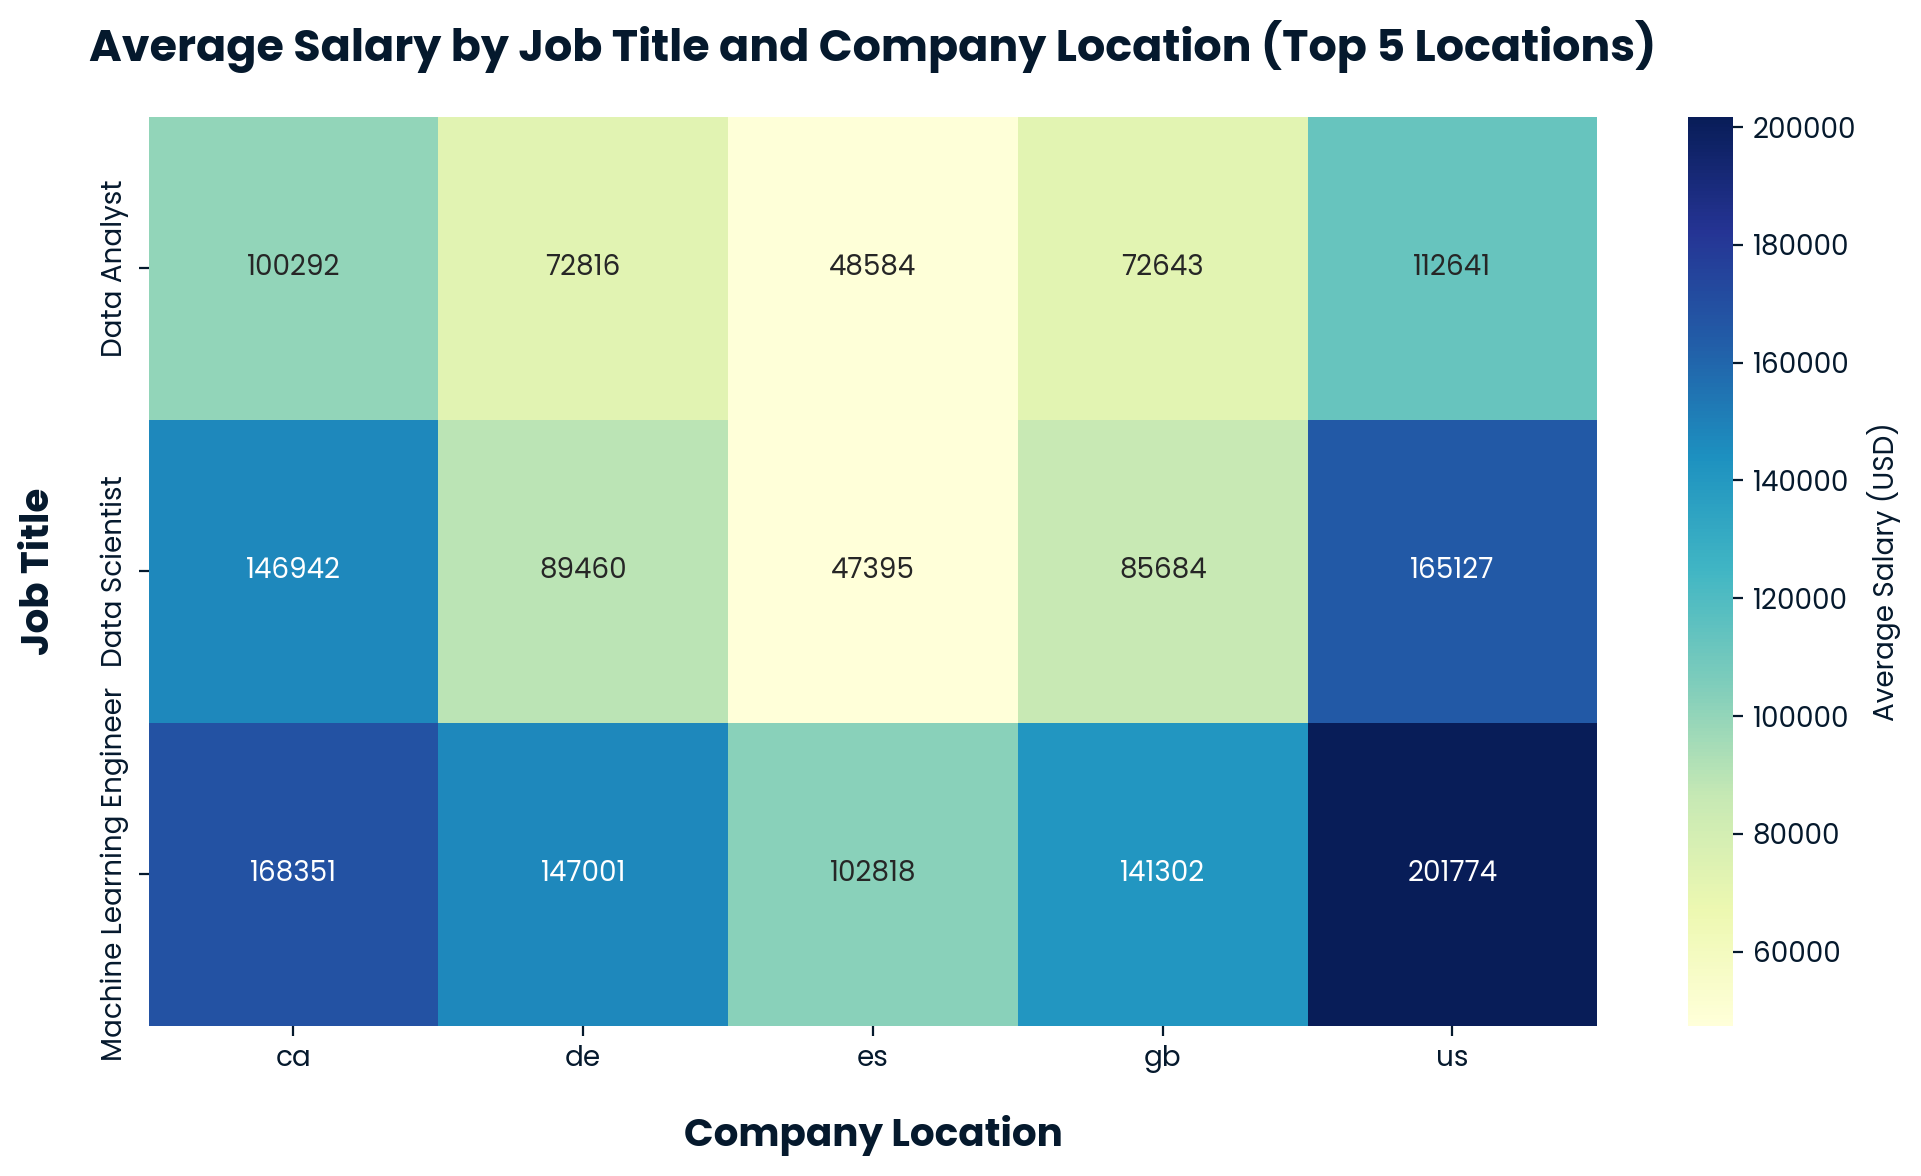

In [27]:
# Impact of Company Location (Top 5 locations by frequency)
top_locations = filtered_df['company_location'].value_counts().head(5).index
avg_salary_by_location = filtered_df[filtered_df['company_location'].isin(top_locations)].groupby(['job_title', 'company_location'])['salary_in_usd'].mean().reset_index()
avg_salary_by_location['job_title'] = avg_salary_by_location['job_title'].str.replace('_', ' ').str.title()

# Pivot for heatmap
pivot_location = avg_salary_by_location.pivot(index='job_title', columns='company_location', values='salary_in_usd')

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_location, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Average Salary (USD)'})
plt.title('Average Salary by Job Title and Company Location (Top 5 Locations)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Company Location', fontsize=14, labelpad=15, fontweight='bold')
plt.ylabel('Job Title', fontsize=14, labelpad=15, fontweight='bold')
plt.tight_layout()
plt.show()

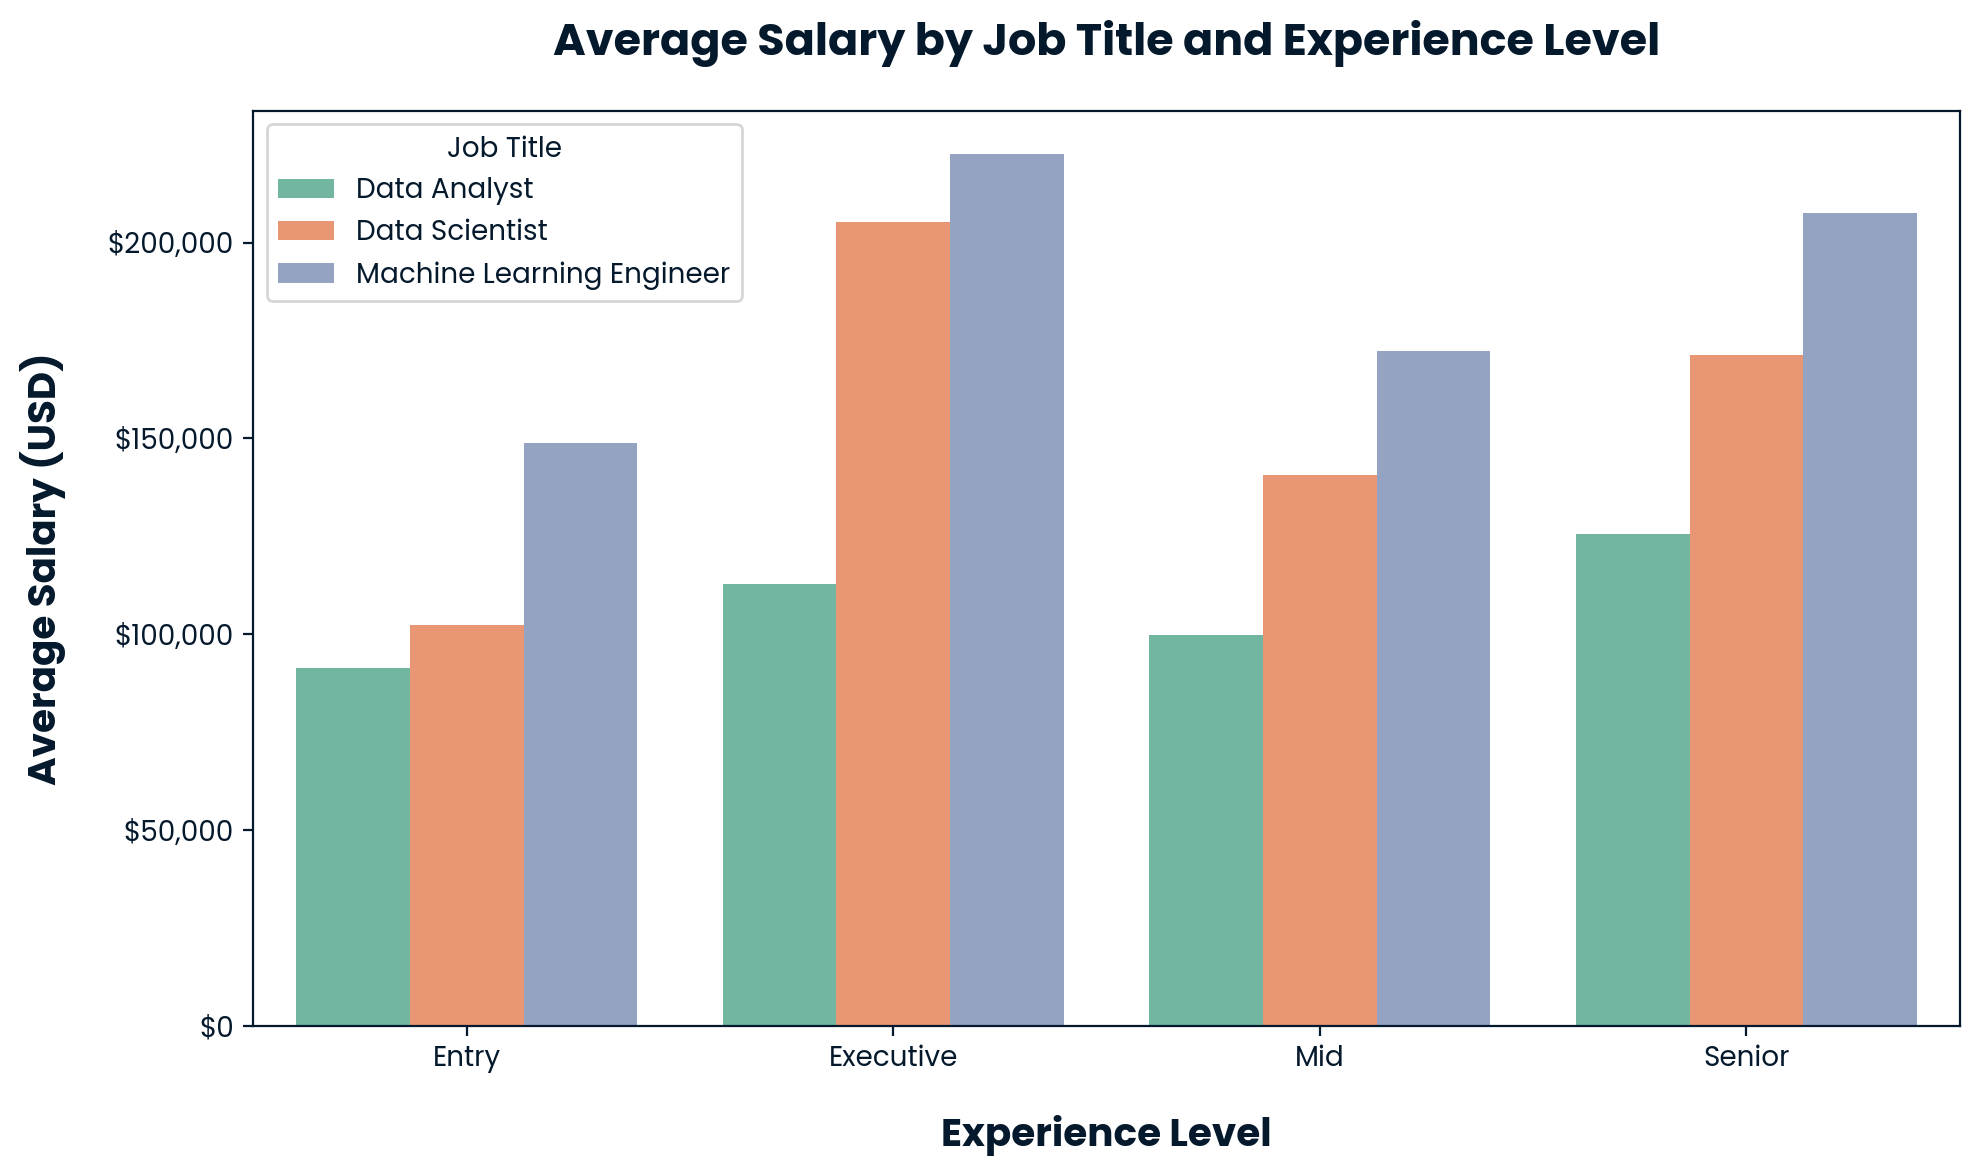

In [28]:
# Impact of Experience Level
avg_salary_by_exp = filtered_df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()
avg_salary_by_exp['job_title'] = avg_salary_by_exp['job_title'].str.replace('_', ' ').str.title()
avg_salary_by_exp['experience_level'] = avg_salary_by_exp['experience_level'].map({'en': 'Entry', 'mi': 'Mid', 'se': 'Senior', 'ex': 'Executive'})

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', hue='job_title', data=avg_salary_by_exp, palette='Set2')
plt.title('Average Salary by Job Title and Experience Level', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Experience Level', fontsize=14, labelpad=15, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, labelpad=15, fontweight='bold')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

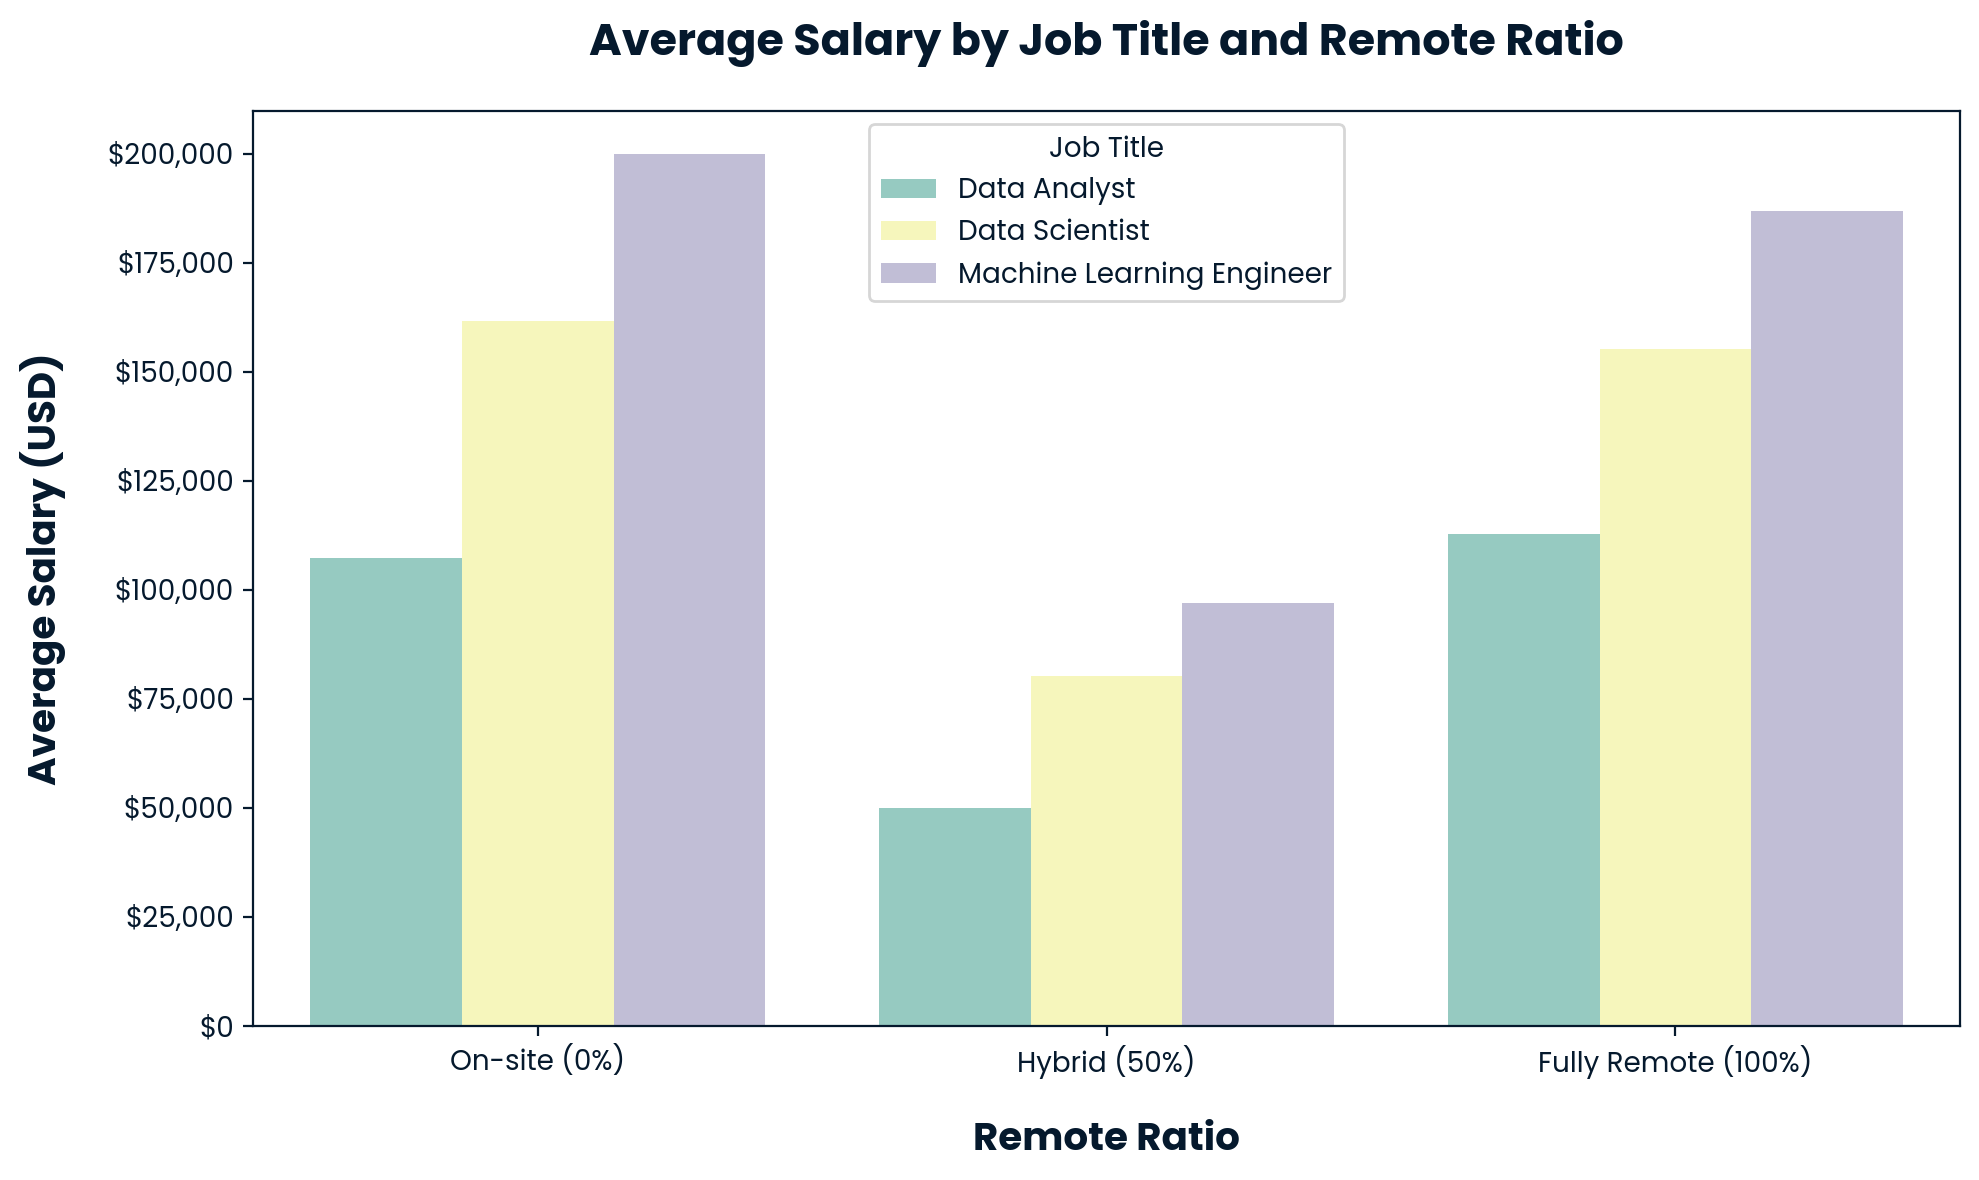

In [29]:
# Impact of Remote Ratio
avg_salary_by_remote = filtered_df.groupby(['job_title', 'remote_ratio'])['salary_in_usd'].mean().reset_index()
avg_salary_by_remote['job_title'] = avg_salary_by_remote['job_title'].str.replace('_', ' ').str.title()
avg_salary_by_remote['remote_ratio'] = avg_salary_by_remote['remote_ratio'].map({0: 'On-site (0%)', 50: 'Hybrid (50%)', 100: 'Fully Remote (100%)'})

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', hue='job_title', data=avg_salary_by_remote, palette='Set3')
plt.title('Average Salary by Job Title and Remote Ratio', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Remote Ratio', fontsize=14, labelpad=15, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, labelpad=15, fontweight='bold')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

In [30]:
# Conditions for Highest Salaries
avg_salary_conditions = filtered_df.groupby(['job_title', 'company_location', 'experience_level', 'remote_ratio'])['salary_in_usd'].mean().reset_index()
highest_salary_conditions = avg_salary_conditions.sort_values(by='salary_in_usd', ascending=False).head(5)
highest_salary_conditions['job_title'] = highest_salary_conditions['job_title'].str.replace('_', ' ').str.title()
highest_salary_conditions['experience_level'] = highest_salary_conditions['experience_level'].map({'en': 'Entry', 'mi': 'Mid', 'se': 'Senior', 'ex': 'Executive'})
highest_salary_conditions['remote_ratio'] = highest_salary_conditions['remote_ratio'].map({0: 'On-site (0%)', 50: 'Hybrid (50%)', 100: 'Fully Remote (100%)'})
print("Top 5 Conditions for Highest Salaries:")
print(highest_salary_conditions)

Top 5 Conditions for Highest Salaries:
                     job_title company_location  ...  remote_ratio  salary_in_usd
72                Data Analyst               mx  ...  On-site (0%)  429950.000000
209             Data Scientist               mx  ...  On-site (0%)  352500.000000
130             Data Scientist               ch  ...  Hybrid (50%)  323295.000000
245             Data Scientist               us  ...  Hybrid (50%)  260000.000000
258  Machine Learning Engineer               au  ...  On-site (0%)  258333.333333

[5 rows x 5 columns]


- **Finding**:
   - **Company Location**: The US offers the highest average salaries across all roles: Machine Learning Engineers at \$201,774, Data Scientists at \$165,127, and Data Analysts at \$112,641. Spain (es) consistently pays the least, with \$102,818 for Machine Learning Engineers, \$47,395 for Data Scientists, and \$48,584 for Data Analysts.
   - **Experience Level**: Senior and Executive-level professionals earn the most. Executive Machine Learning Engineers average around \$210,000, followed by Data Scientists at \$200,000, while Data Analysts peak at \$120,000 (Senior). Entry-level salaries are lowest, with Data Analysts at ~\$90,000, Data Scientists at ~\$100,000, and Machine Learning Engineers at ~\$110,000.
   - **Remote Ratio**: On-site roles (0% remote) generally pay the most, with Machine Learning Engineers at ~\$180,000, Data Scientists at ~\$160,000, and Data Analysts at ~\$110,000. Hybrid roles (50%) pay the least, with Data Scientists at ~\$80,000, Machine Learning Engineers at ~\$100,000, and Data Analysts at ~\$90,000. Fully remote roles (100%) are in between, with Data Scientists at ~$150,000.
   - **Highest Salaries**: The top condition is Data Analysts in Mexico (mx), on-site, at \$429,950, followed by Data Scientists in Mexico, on-site, at \$352,500. Other high conditions include Data Scientists in Switzerland (ch), hybrid, at \$323,295, and in the US, hybrid, at \$260,000, with Machine Learning Engineers in Australia (au), on-site, at \$258,333.33.
- **Insights**: The US dominates average salaries due to its large tech market, but Mexico offers the highest individual salaries, possibly due to specific high-paying roles or outliers. Senior and Executive roles command significant premiums, reflecting the value of experience. On-site roles generally offer higher pay, though hybrid roles in specific regions (e.g., Switzerland, US) can also yield high salaries, suggesting flexibility in high-paying markets.
- **Why It Matters**: HR consultancies can target Senior and Executive professionals in the US for competitive average salaries, but for top talent, offering over \$350,000 in regions like Mexico for on-site roles is key to attracting high earners in a competitive market.

## VI. Predictive Model for Salary Estimation

### Constructing a Predictive Model for Salary Estimation Using Experience Level, Company Location, and Remote Ratio: Determining the Strongest Predictors

We build a Linear Regression model to predict salaries and identify the most influential features.

In [31]:
# Prepare features and target
X = filtered_df[['experience_level', 'company_location', 'remote_ratio']]
X = pd.get_dummies(X, columns=['experience_level', 'company_location'], drop_first=True)
y = filtered_df['salary_in_usd']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model 1 - R-squared: {r2:.4f}, RMSE: ${rmse:,.0f}")

Model 1 - R-squared: 0.1932, RMSE: $62,095


In [32]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance (Coefficients):")
feature_importance

Feature Importance (Coefficients):


,Feature,Coefficient
53,company_location_pr,101803.644079
1,experience_level_ex,96428.341487
45,company_location_mx,81031.207268
37,company_location_ir,72246.261374
23,company_location_eg,70744.632053
...,...,...
24,company_location_es,-47795.937610
13,company_location_cf,-48980.355921
61,company_location_sk,-52382.363103
57,company_location_ru,-54434.566955


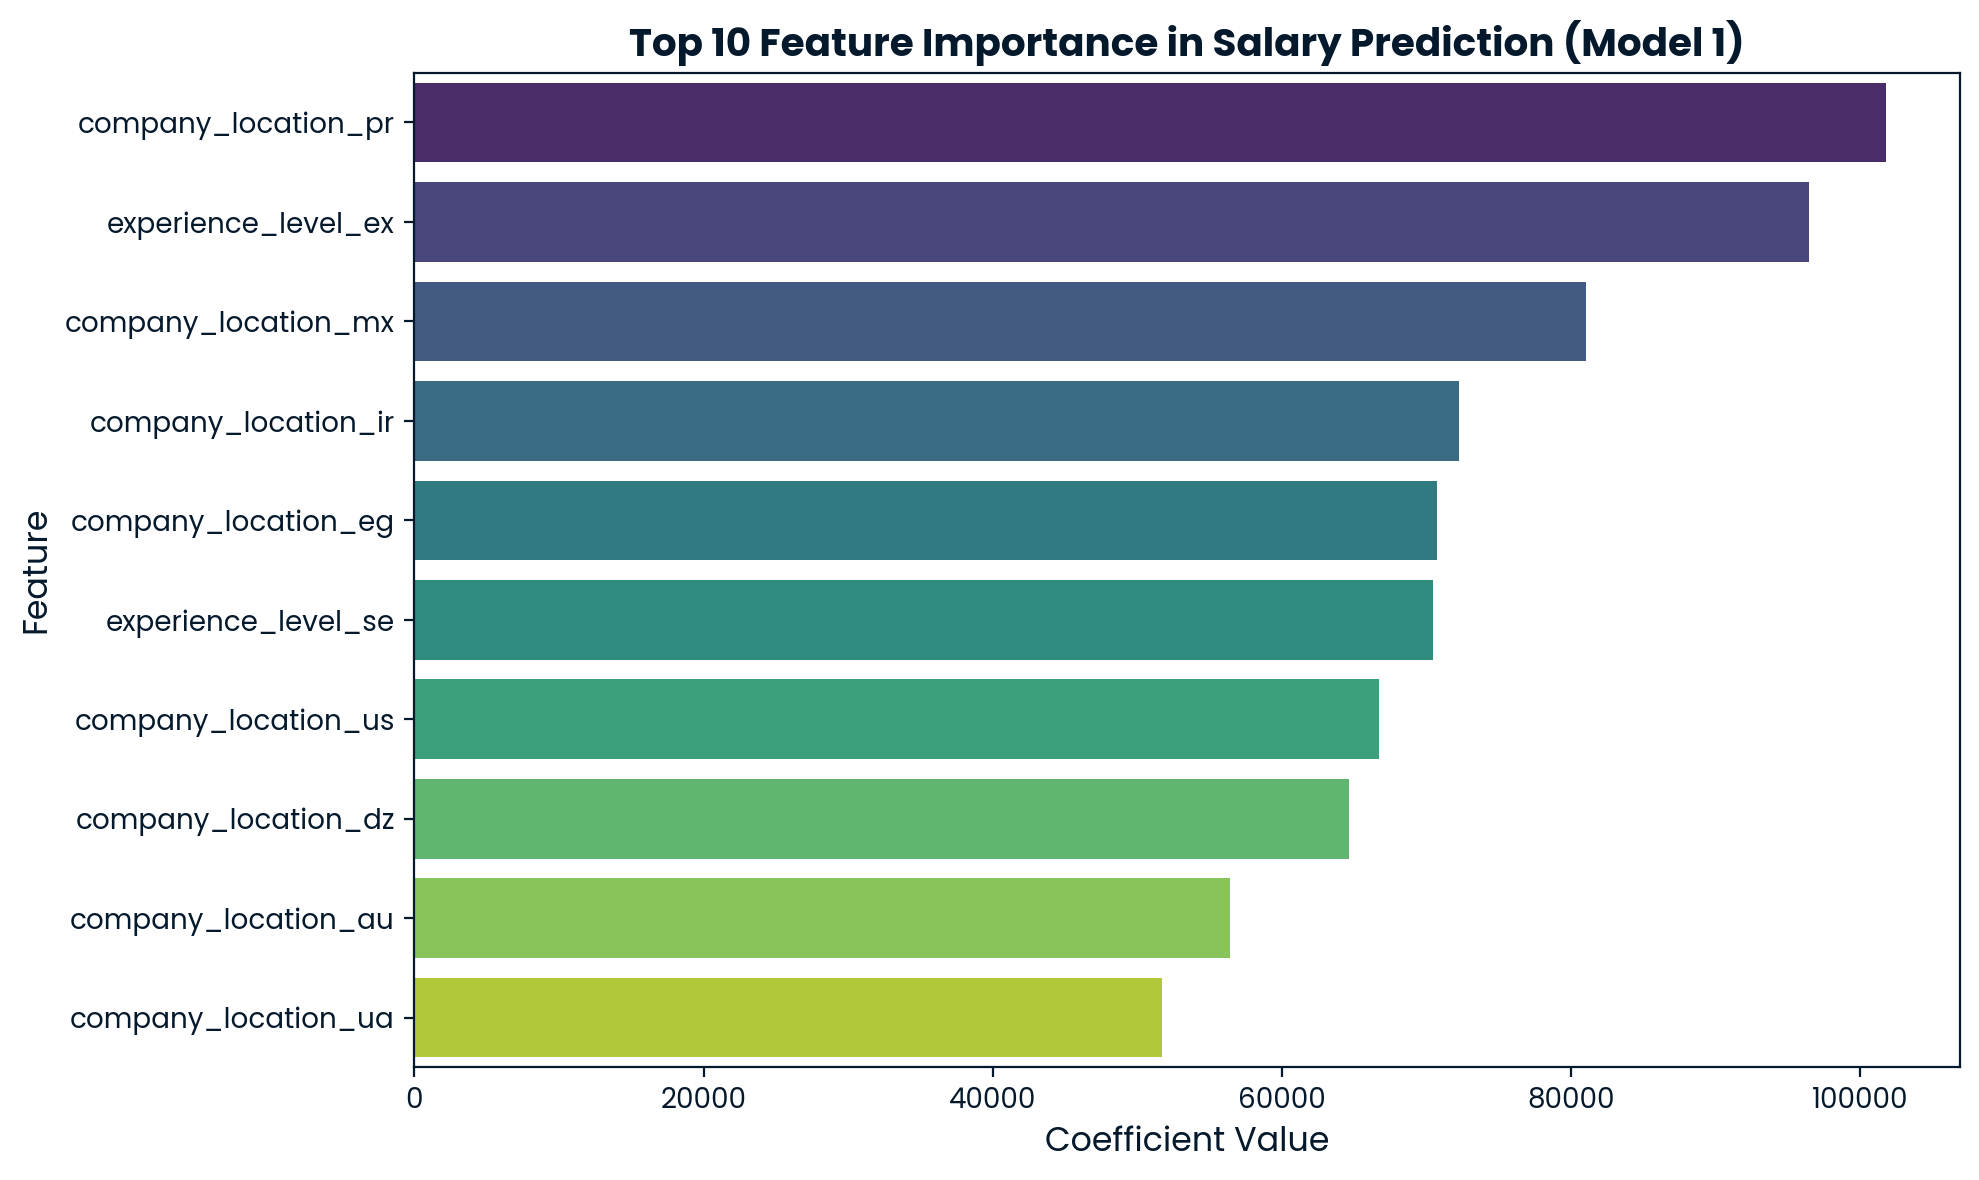

In [33]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Feature Importance in Salary Prediction (Model 1)', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

- **Finding**:
   - The model achieves an R-squared of 0.1932 and an RMSE of \$62,095, indicating limited predictive power, as it explains only 19.32% of the variance in salaries.
   - The strongest predictors are `company_location_pr` (Puerto Rico, coefficient: \$101,803.64), `experience_level_ex` (Executive, \$96,428.34), and `company_location_mx` (Mexico, \$81,031.21). Other notable predictors include `company_location_ir` (Iran, \$72,246.26) and `experience_level_se` (Senior, \$70,442.61).
- **Insights**: Locations like Puerto Rico and Mexico have a significant positive impact on salaries, aligning with the EDA’s highest salary conditions (e.g., Mexico). Executive and Senior experience levels are also key drivers, consistent with the EDA findings. The model’s low R-squared suggests that other unmodeled factors (e.g., industry sector) may influence salaries.
- **Why It Matters**: HR can use these insights to prioritize competitive offers in high-impact regions like Puerto Rico and Mexico, especially for Executive and Senior roles, to attract top talent.

## VII. Expanded Predictive Model with Additional Features

### Improving the Salary Prediction Model with Company Size and Employment Type: Performance Evaluation and Proposals for Future Enhancements

We expand the model by adding `company_size` and `employment_type`, evaluate its performance, and propose new features.

In [34]:
# Prepare expanded features
X_expanded = filtered_df[['experience_level', 'company_location', 'remote_ratio', 'company_size', 'employment_type']]
X_expanded = pd.get_dummies(X_expanded, columns=['experience_level', 'company_location', 'company_size', 'employment_type'], drop_first=True)
y = filtered_df['salary_in_usd']

# Split data
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_expanded, y, test_size=0.2, random_state=42)

# Train expanded model
model_expanded = LinearRegression()
model_expanded.fit(X_train_exp, y_train_exp)

# Predict and evaluate
y_pred_exp = model_expanded.predict(X_test_exp)
r2_exp = r2_score(y_test_exp, y_pred_exp)
rmse_exp = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
print(f"Model 2 - R-squared: {r2_exp:.4f}, RMSE: ${rmse_exp:,.0f}")

Model 2 - R-squared: 0.1942, RMSE: $62,055


In [35]:
# Feature importance
feature_importance_exp = pd.DataFrame({'Feature': X_expanded.columns, 'Coefficient': model_expanded.coef_})
feature_importance_exp = feature_importance_exp.sort_values(by='Coefficient', ascending=False)
print("Feature Importance (Expanded Model):")
feature_importance_exp.head(10)

Feature Importance (Expanded Model):


,Feature,Coefficient
37,company_location_ir,100359.608426
53,company_location_pr,98330.673221
1,experience_level_ex,96058.183911
20,company_location_dz,80083.373990
45,company_location_mx,79246.613404
3,experience_level_se,69969.997732
23,company_location_eg,67441.060830
65,company_location_us,63568.688881
8,company_location_au,54422.111097
64,company_location_ua,48347.402649


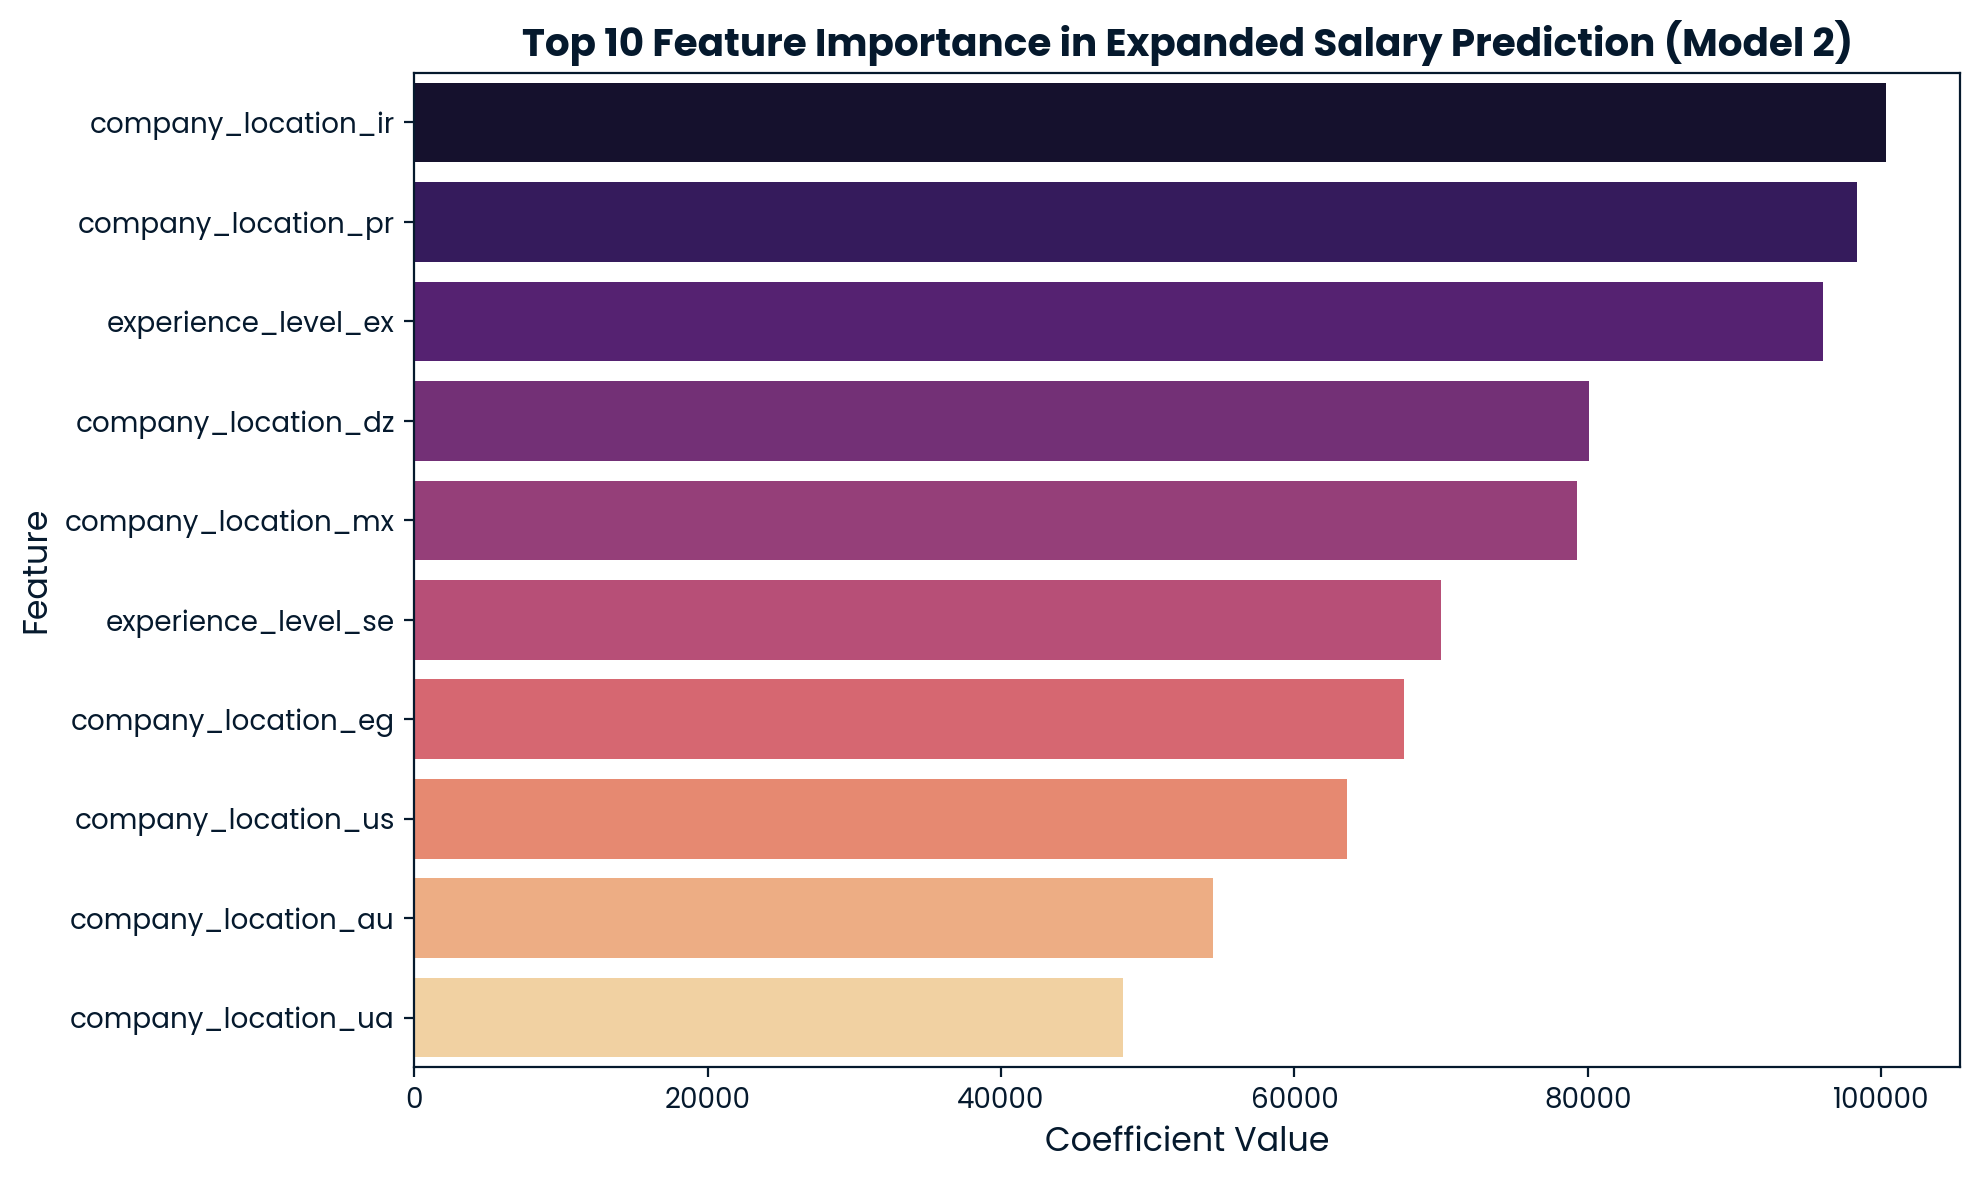

In [36]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_exp.head(10), palette='magma')
plt.title('Top 10 Feature Importance in Expanded Salary Prediction (Model 2)', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

- **Finding**:
   - The expanded model slightly improves performance, with the R-squared increasing from 0.1932 to 0.1942 and the RMSE decreasing from \$62,095 to \$62,055, indicating a marginal enhancement in predictive accuracy.
   - **What Improves**: Adding `company_size` and `employment_type` provides a small boost to the model’s explanatory power. Top predictors remain `company_location_ir` (Iran, coefficient: $100,359.60), `company_location_pr` (Puerto Rico, $98,330.67), and `experience_level_ex` (Executive, $96,058.18), with `company_location_mx` (Mexico, $79,246.61) also significant.
   - **What Doesn't Improve**: The improvement is minimal, and the RMSE remains high, likely due to outliers (e.g., high salaries in Mexico, such as \$429,950 for Data Analysts). The R-squared is still low, suggesting that additional features are needed to capture salary variance more effectively.
- **Proposed New Features**:
   - **Industry Sector**: Salaries may vary across tech subsectors (e.g., AI, fintech), explaining additional variance.
   - **Company Revenue**: Higher-revenue companies often have larger compensation budgets, making this a potential predictor.
   - **Benefits Package**: Non-salary compensation (e.g., stock options) impacts total compensation and should be considered.
   - **Years of Experience**: A numerical measure of experience could provide more granularity than the categorical `experience_level`.
   - **Cost of Living Index**: Adjusting for regional cost of living differences (e.g., US vs. Mexico) could normalize salary variations and improve predictions.
- **Insights**: The slight improvement from adding company size and employment type indicates their relevance, but their impact is overshadowed by location and experience level. The persistence of outliers suggests that the model struggles with extreme values, necessitating more robust techniques or features.
- **Why It Matters**: A slightly improved model helps HR set more accurate salary benchmarks, but addressing outliers and incorporating proposed features can further enhance its utility, ensuring better alignment with market trends.

## Recommendations

- **For Executives**: Offer salaries above \$350,000 for top Data Analysts and Data Scientists in Mexico, particularly for on-site roles, to compete for high earners. In the US, target Senior and Executive Machine Learning Engineers with offers around \$200,000 to align with market averages.
- **For HR Teams**: Focus on Senior and Executive-level professionals, especially in high-paying regions like Puerto Rico and Iran, where location significantly boosts salaries. Prioritize on-site roles to leverage the salary premium, but consider hybrid options in regions like Switzerland and the US for specific roles.
- **Data Collection**: Include variables such as industry sector, company revenue, benefits package, years of experience, and cost of living index in future surveys to capture a broader range of salary determinants and improve predictive accuracy.
- **Predictive Modeling**: Explore advanced models like Random Forest or XGBoost to better handle outliers (e.g., high salaries in Mexico) and non-linear relationships, potentially increasing the model’s explanatory power beyond the current R-squared of 0.1942.

**Final Note**: These insights enable clients to make data-driven decisions to attract and retain top tech talent in a competitive market, positioning them to succeed in the evolving tech landscape.

## About the Author

🥷 **John Mike Asuncion (Mike)**

- Driven **1st-year Computer Engineering student** with a keen interest in Data Science, Engineering, Machine Learning, and Artificial Intelligence.

### 📫 Connect With Me
I'm always open to collaborations, learning opportunities, and connecting with fellow tech enthusiasts! Reach out via:  
- 📧 Email: [johnmikeasuncion17@gmail.com](mailto:johnmikeasuncion17@gmail.com)
- 🔗 LinkedIn: [Mike's LinkedIn Profile](https://www.linkedin.com/in/john-mike-asuncion-a44232320/)
- 🔗 GitHub: [Mike's GitHub Profile](https://github.com/johnmikx)
- 💼 DataCamp: [Mike's Portfolio](https://www.datacamp.com/portfolio/johnmikeasuncion17)
- 🔗 Facebook: [Mike's Facebook Profile](https://www.facebook.com/mikekaizennn)